In [5]:
import pandas as pd
import numpy as np
from __future__ import print_function

df = pd.read_csv('data/loanStats.csv') 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466287 entries, 0 to 466286
Data columns (total 68 columns):
id                             466287 non-null int64
member_id                      466287 non-null int64
loan_amnt                      466287 non-null int64
funded_amnt                    466287 non-null int64
funded_amnt_inv                466287 non-null int64
term                           466287 non-null object
int_rate                       466287 non-null float64
installment                    466287 non-null float64
grade                          466287 non-null object
sub_grade                      466287 non-null object
emp_title                      438704 non-null object
emp_length                     466287 non-null object
home_ownership                 466287 non-null object
annual_inc                     466283 non-null float64
is_inc_v                       466287 non-null object
issue_d                        466287 non-null object
loan_status                

In [3]:
# now lets look at the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,1.0,1.0,1.0,1.0,0,1.01685,20161201T000000,0,1,1


KeyError: ''

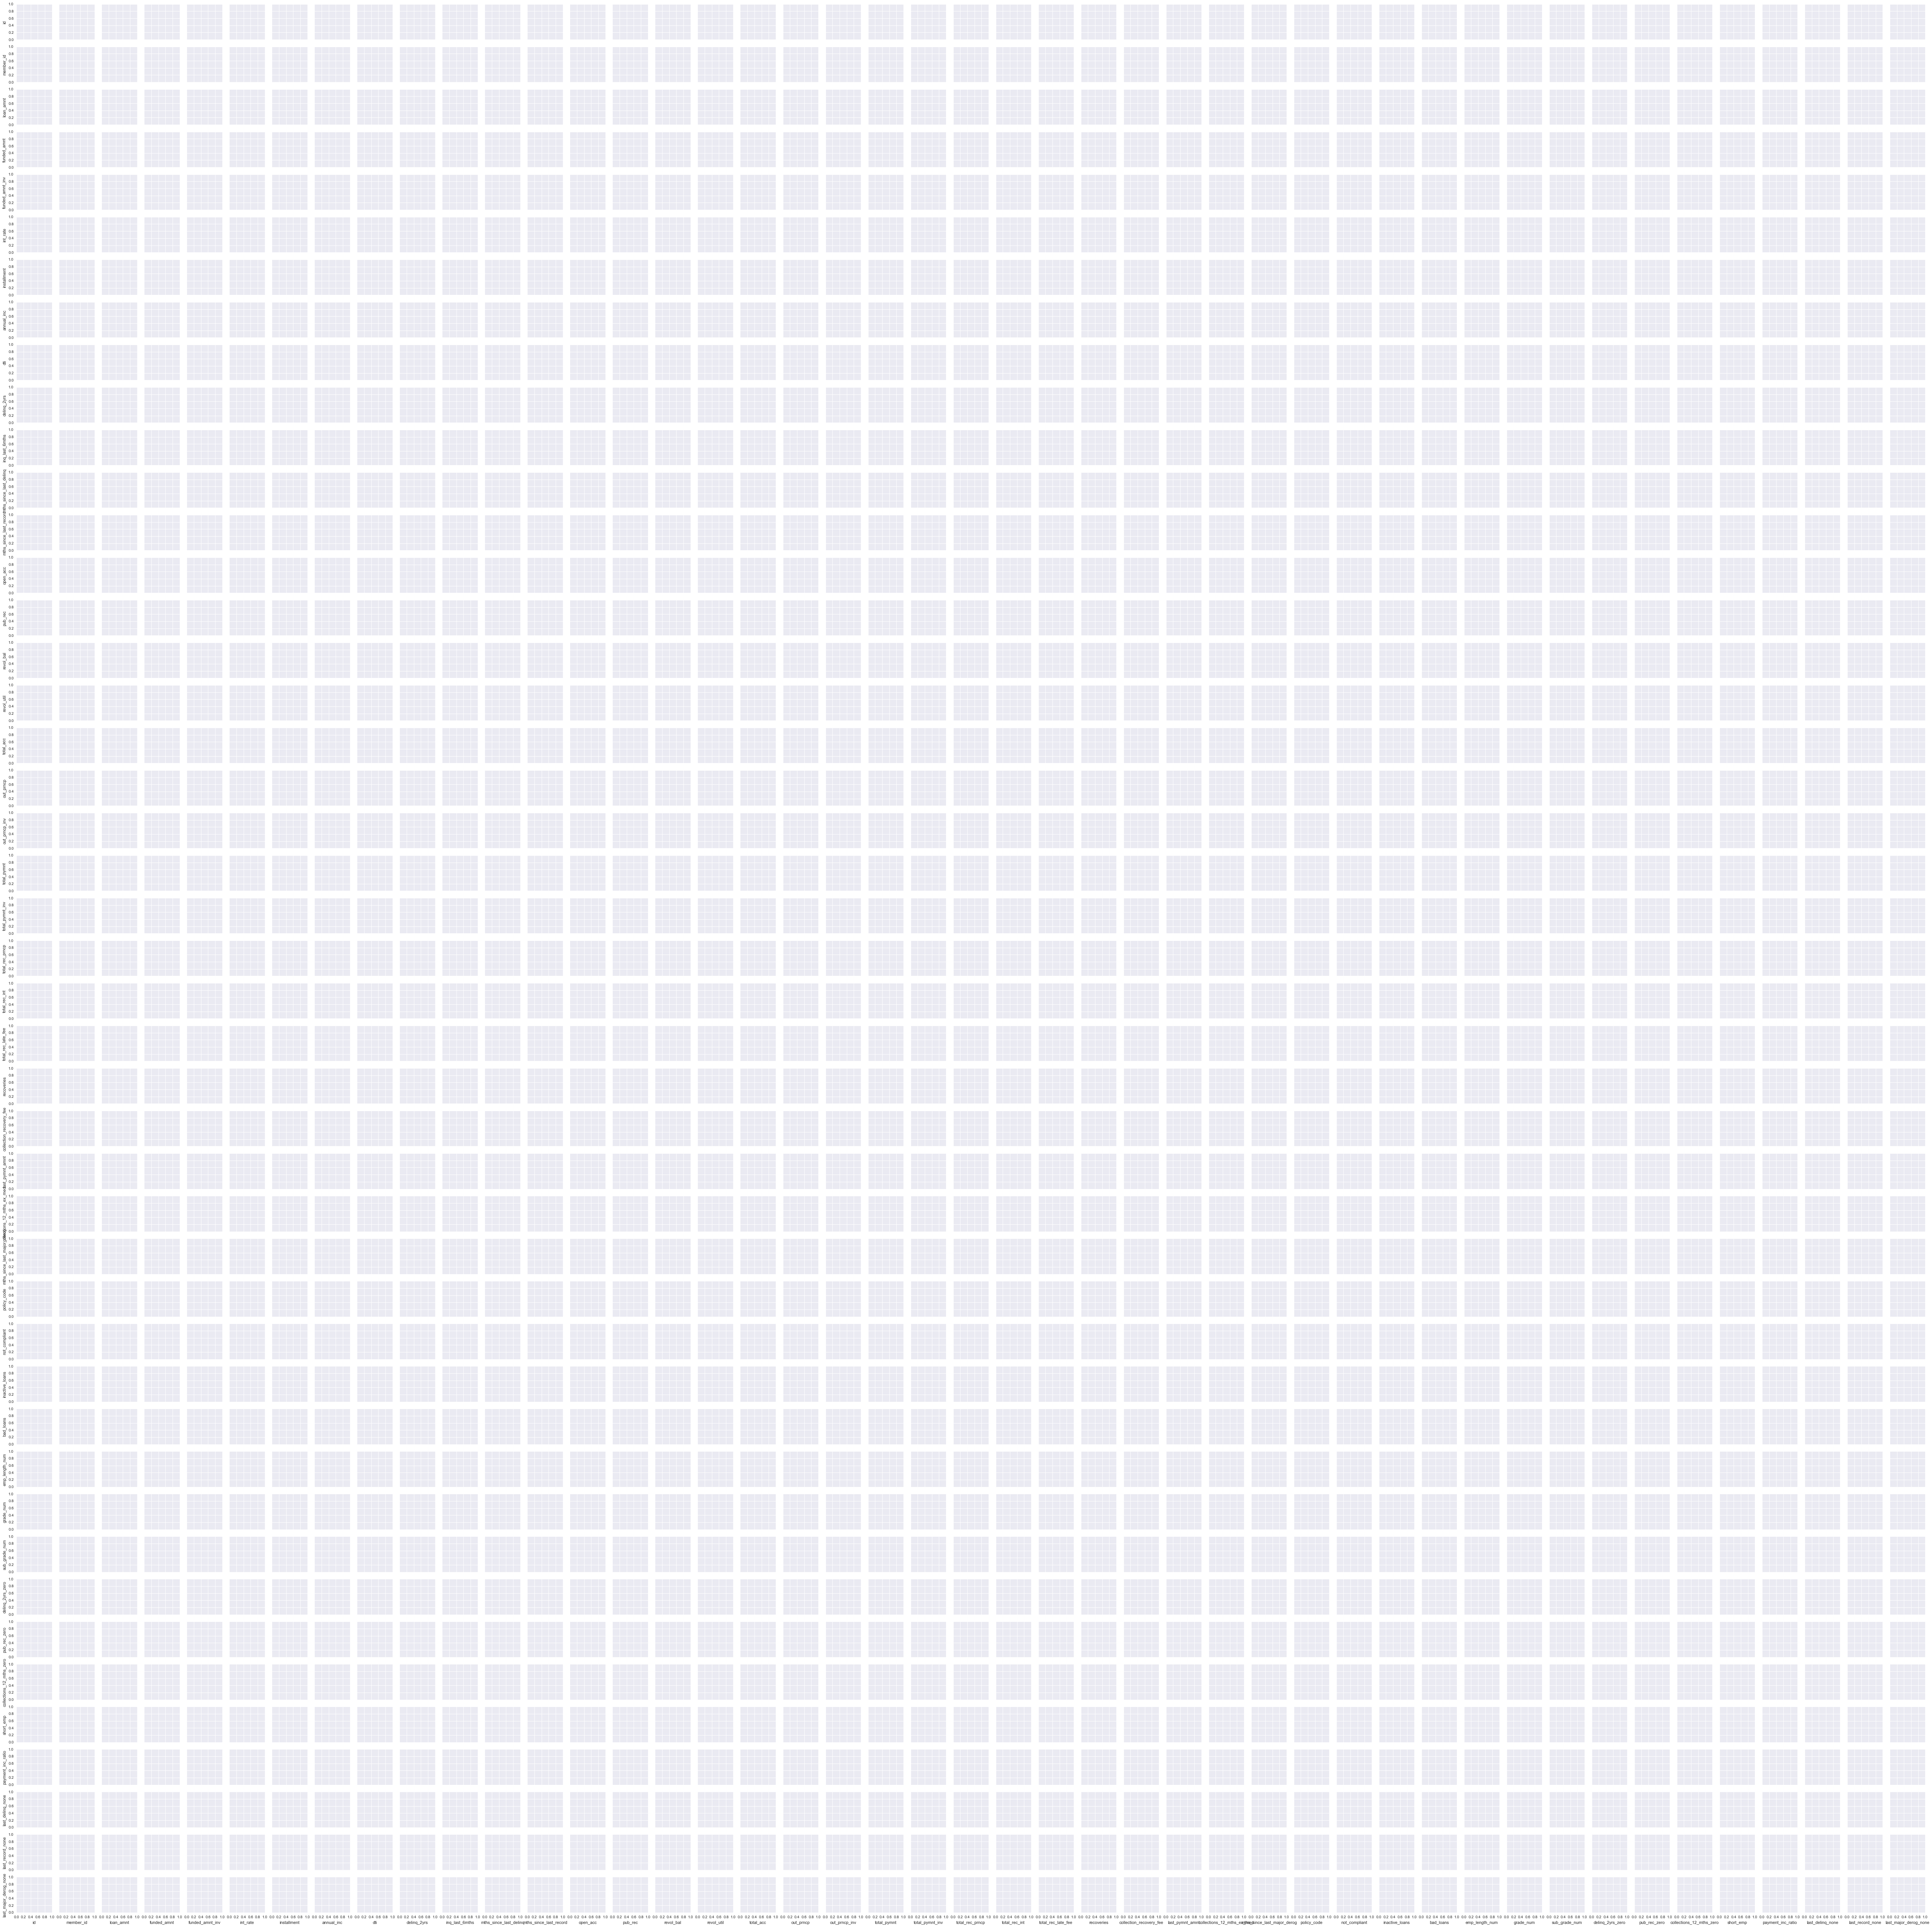

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(df, hue="", size=2)

 ###Working with DataFrames
 We can index in to DataFrame in a number of ways:

In [15]:
# the 'fillna' function will take the given series (the output above)
# and fill in the missing values for the columns it has
df_imputed = df.fillna(df.median()) # note that to do this all values must be numeric
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 14 columns):
age                  920 non-null int64
is_male              920 non-null object
chest_pain           920 non-null int64
rest_blood_press     920 non-null float64
cholesterol          920 non-null float64
high_blood_sugar     920 non-null object
rest_ecg             920 non-null float64
max_heart_rate       920 non-null float64
exer_angina          920 non-null object
ST_depression        920 non-null float64
Peak_ST_seg          920 non-null float64
major_vessels        920 non-null float64
thal                 920 non-null float64
has_heart_disease    920 non-null int64
dtypes: float64(8), int64(3), object(3)

Notice that the object variables are unchanged, but all the numeric/ordinal values have been filled in with the median of the columns. Let's try something (slightly) smarter, and fill in the oridinals with the median and the continuous with the mean.

In [16]:
# make  one series for imputing with
series_mean = df[continuous_features].mean()
series_median = df[categ_features+ordinal_features].median()
cat_series = pd.concat((series_median,series_mean))

print cat_series

is_male                1.000000
high_blood_sugar       0.000000
exer_angina            0.000000
age                   54.000000
major_vessels          0.000000
chest_pain             4.000000
rest_ecg               0.000000
Peak_ST_seg            2.000000
thal                   6.000000
has_heart_disease      1.000000
rest_blood_press     132.132404
cholesterol          199.130337
max_heart_rate       137.545665
ST_depression          0.883178
dtype: float64


In [17]:
# now let's impute the numbers a bit differently

df_imputed = df.fillna(value=cat_series)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 14 columns):
age                  920 non-null int64
is_male              920 non-null object
chest_pain           920 non-null int64
rest_blood_press     920 non-null float64
cholesterol          920 non-null float64
high_blood_sugar     920 non-null object
rest_ecg             920 non-null float64
max_heart_rate       920 non-null float64
exer_angina          920 non-null object
ST_depression        920 non-null float64
Peak_ST_seg          920 non-null float64
major_vessels        920 non-null float64
thal                 920 non-null float64
has_heart_disease    920 non-null int64
dtypes: float64(8), int64(3), object(3)

In [18]:
df_imputed[categ_features].describe()

,is_male,high_blood_sugar,exer_angina
count,920,920,920
unique,2,3,3
top,1,0,0
freq,726,692,528


###Indexing logically into Data Frames
Let's now say that we are only interested in the summary of the dataframe when the patient has heart disease. We can achieve this using a few line of code:

In [19]:
df_imputed[df_imputed.has_heart_disease==0].describe()

,age,chest_pain,rest_blood_press,cholesterol,rest_ecg,max_heart_rate,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411
mean,50.547445,2.761557,130.021042,226.575368,0.547445,148.252830,0.441963,1.729927,0.111922,5.085158,0
std,9.433700,0.903425,16.460208,74.301504,0.805204,23.152969,0.704565,0.515662,0.427276,1.510951,0
min,28.000000,1.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,1.000000,0.000000,3.000000,0
25%,43.000000,2.000000,120.000000,199.130337,0.000000,135.500000,0.000000,1.000000,0.000000,3.000000,0
50%,51.000000,3.000000,130.000000,225.000000,0.000000,150.000000,0.000000,2.000000,0.000000,6.000000,0
75%,57.000000,4.000000,140.000000,266.000000,1.000000,165.000000,0.883178,2.000000,0.000000,6.000000,0
max,76.000000,4.000000,190.000000,564.000000,2.000000,202.000000,4.200000,3.000000,3.000000,7.000000,0


In [20]:
# or we can use the extremely useful "groupby" function
df_imputed.groupby(by='has_heart_disease').median()

,age,chest_pain,rest_blood_press,cholesterol,rest_ecg,max_heart_rate,ST_depression,Peak_ST_seg,major_vessels,thal
has_heart_disease,,,,,,,,,,
0,51,3,130.000000,225.0,0,150.0,0.00,2,0,6
1,55,4,130.000000,226.0,0,130.0,1.00,2,0,6
2,58,4,132.132404,193.0,0,130.0,1.40,2,0,6
3,60,4,132.132404,212.0,1,122.0,1.00,2,0,6
4,59,4,133.066202,218.5,1,126.5,2.45,2,0,6


In [21]:
df_imputed.groupby(by=df_imputed.has_heart_disease>0).mean()

,age,chest_pain,rest_blood_press,cholesterol,rest_ecg,max_heart_rate,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
has_heart_disease,,,,,,,,,,,
False,50.547445,2.761557,130.021042,226.575368,0.547445,148.252830,0.441963,1.729927,0.111922,5.085158,0.000000
True,55.903733,3.644401,133.837257,176.969418,0.648330,128.899997,1.239443,1.943026,0.320236,5.960707,1.799607


In [22]:
df_imputed.groupby(by=df_imputed.major_vessels>2).mean()

,age,chest_pain,rest_blood_press,cholesterol,rest_ecg,max_heart_rate,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
major_vessels,,,,,,,,,,,
False,53.368889,3.241111,132.026458,197.656567,0.586667,137.612235,0.861359,1.847778,0.165556,5.566667,0.966667
True,59.900000,3.650000,136.900000,265.450000,1.350000,134.550000,1.865000,1.850000,3.000000,5.700000,2.300000


###One Hot Encoding of Categorical Variables

In [23]:
# one hot encoded variables can be created using the get_dummies variable
tmpdf = pd.get_dummies(df_imputed['chest_pain'],prefix='chest')

tmpdf.head()

,chest_1,chest_2,chest_3,chest_4
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [24]:
#one hot encoding of ALL categorical variables
# there is lot going on in this one line of code, so let's step through it

# pd.concat([*]], axis=1) // this line of code concatenates all the data frames in the [*] list
# [** for col in categ_features] // this steps through each feature in categ_features and 
#                                //   creates a new element in a list based on the output of **
# pd.get_dummies(df_imputed[col],prefix=col) // this creates a one hot encoded dataframe of the variable=col (like code above)

one_hot_df = pd.concat([pd.get_dummies(df_imputed[col],prefix=col) for col in categ_features], axis=1)

one_hot_df.head()

,is_male_0,is_male_1,high_blood_sugar_0.0,high_blood_sugar_0,high_blood_sugar_1,exer_angina_0.0,exer_angina_0,exer_angina_1
0,0,1,0,0,1,0,1,0
1,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0
4,1,0,0,1,0,0,1,0


## Calling R from iPython

- Note: you will need R installed on your machine to run these!!

iPython has a lot of interesting "magics" built in. If you use R and have it installed on your machine, then you can write and look at R code directly from iPython cells. R also uses data frames, which we can push data into directly from the Pandas object we are using:

In [25]:
# CONVERT PANDAS DATAFRAME TO R DATA.FRAME
# adapted from: http://tagteam.harvard.edu/hub_feeds/1981/feed_items/196017
# I have better luck with both calls here

%load_ext rmagic
%load_ext rpy2.ipython

df_colnames = df_imputed.columns

/Library/Python/2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [26]:
df_colnames

Index([u'age', u'is_male', u'chest_pain', u'rest_blood_press', u'cholesterol', u'high_blood_sugar', u'rest_ecg', u'max_heart_rate', u'exer_angina', u'ST_depression', u'Peak_ST_seg', u'major_vessels', u'thal', u'has_heart_disease'], dtype='object')

Now lets take the data frame from pandas and tell Rmagics that we want to have variables available in the R workspace. We use the %%R command to tell iPython that the entire cell is R code. The "-i" tells Rmagics that we want to transfer those variables over to R.

The following code will take the variables df_imputed and df_colnames into the R workspace and test if they are truly saved as R data.frames type variables.

In [27]:
%%R -i df_imputed,df_colnames 

colnames(df_imputed) <- unlist(df_colnames); 
print(is.data.frame(df_imputed))

[1] TRUE


Theay were data.frames! Great. Let's call an R function on the data.frame.

In [28]:
%%R -i df_imputed 
print(summary(df_imputed))

      age        is_male   chest_pain   rest_blood_press  cholesterol   
 Min.   :28.00   0:194   Min.   :1.00   Min.   :  0.0    Min.   :  0.0  
 1st Qu.:47.00   1:726   1st Qu.:3.00   1st Qu.:120.0    1st Qu.:177.8  
 Median :54.00           Median :4.00   Median :130.0    Median :221.0  
 Mean   :53.51           Mean   :3.25   Mean   :132.1    Mean   :199.1  
 3rd Qu.:60.00           3rd Qu.:4.00   3rd Qu.:140.0    3rd Qu.:267.0  
 Max.   :77.00           Max.   :4.00   Max.   :200.0    Max.   :603.0  
 high_blood_sugar    rest_ecg      max_heart_rate  exer_angina
 0  :692          Min.   :0.0000   Min.   : 60.0   0  :528    
 0.0: 90          1st Qu.:0.0000   1st Qu.:120.0   0.0: 55    
 1  :138          Median :0.0000   Median :138.0   1  :337    
                  Mean   :0.6033   Mean   :137.5              
                  3rd Qu.:1.0000   3rd Qu.:156.0              
                  Max.   :2.0000   Max.   :202.0              
 ST_depression      Peak_ST_seg    major_vessels

So we are able to call some R and get console output, now let's make some changes to the data.fram in R and print the result back in python.

In [29]:
print 'original:', df_imputed.age.head()

# give df_imputed, then multiply it by to in R
# the %R command tells iPython its just one line of R code
%R -i df_imputed df_imputed$age <- df_imputed$age*2

# now we are back in python, did it change?
print 'after manipulation in R:', df_imputed.age.head()

original: 0    63
1    67
2    67
3    37
4    41
Name: age, dtype: int64
after manipulation in R: 0    63
1    67
2    67
3    37
4    41
Name: age, dtype: int64


Well, it looks like the data was not synchronized... So instead let's setup an output variable for the DataFrame that we send into R. `-i df_imputed` means that we are sending in the DataFrame as an R data.frame. `-o df_imputed` means we are also getting the same variable and copying it back to the python workspace.

In [30]:
print 'original:', df_imputed.age.head() 

# This is the same code as before, but now with an output variable
%R -i df_imputed -o df_imputed  df_imputed$age <- df_imputed$age*2
# you can place the above on any line to make sure that the data stays
# synchronized between pandas and python
print 'after manipulation in R:', df_imputed.age.head()

original: 0    63
1    67
2    67
3    37
4    41
Name: age, dtype: int64
after manipulation in R: 0    126
1    134
2    134
3     74
4     82
Name: age, dtype: float64


Awesome. So now we can send DataFrames into R, manipulate them, and get them back into the python workspace. Is this memory hogging? Yes. Is it really useful for when you want to connect and work with different parts of R? You betcha.

In [31]:
# We can also just go and get new variables from R and 
# have them spit them back out for us
# here I am sending in df_imputed and getting back a data frame
# created in R
%R -i df_imputed -o df_from_R df_from_R <- df_imputed

# notice that the only differebce is that the integers are 32 bits
df_from_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 14 columns):
age                  920 non-null float64
is_male              920 non-null object
chest_pain           920 non-null int32
rest_blood_press     920 non-null float64
cholesterol          920 non-null float64
high_blood_sugar     920 non-null object
rest_ecg             920 non-null float64
max_heart_rate       920 non-null float64
exer_angina          920 non-null object
ST_depression        920 non-null float64
Peak_ST_seg          920 non-null float64
major_vessels        920 non-null float64
thal                 920 non-null float64
has_heart_disease    920 non-null int32
dtypes: float64(9), int32(2), object(3)

That's it. Use this as a reference sheet for Pandas, some basic imputation, and calling R code. Thanks!